### 한국에서 코로나 바이러스에 감염된 사람들 데이터셋 처리

 - csv 파일 형식
 
 - column 항목
 
 > 0. id: 확진자의 id (n번째 확진자)
 > 
 > 1. sex: 성별
 > 
 > 2. birth_year: 출생 연도
 > 
 > 3. country: 국적
 > 
 > 4. region: 주 활동 지역 (광역시/도 단위)
 > 
 > 5. disease : 기저 질환
 >
 > 6. group: 특정 집단 관련
 > 
 > 7. infection_reason: 감염 경로
 > 
 > 8. infection_order: 감염 차수 (n차 감염)
 > 
 > 9. infected_by: 해당 확진자의 감염원 id
 > 
 > 10. contact_number: 접촉자 수
 > 
 > 11. confirmed_date: 확진 일자
 > 
 > 12. released_date: 퇴원 일자 (격리 해제 일자)
 > 
 > 13. deceased_date: 사망 일자
 > 
 > 14. state: 상태

In [1]:
# draw charts
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

In [2]:
# CSV 파일 읽어들이기

import csv  # csv 모듈 임포트
import pprint

# 파일 위치, 경로 정의
file_path = '01_South_Korea/patient.csv'

# patient.csv 파일 열기
with open(file_path) as file:
    reader = csv.reader(file)  # CSV 파일을 읽어들이는 읽기 객체
    raw = list(reader)      #  CSV 파일 내용을 리스트로 읽어들인다

pprint.pprint(raw[:10])  # 읽어들인 내용을 화면에 출력

[['id',
  'sex',
  'birth_year',
  'country',
  'region',
  'disease',
  'group',
  'infection_reason',
  'infection_order',
  'infected_by',
  'contact_number',
  'confirmed_date',
  'released_date',
  'deceased_date',
  'state'],
 ['1',
  'female',
  '1984',
  'China',
  'filtered at airport',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '45',
  '2020-01-20',
  '2020-02-06',
  '',
  'released'],
 ['2',
  'male',
  '1964',
  'Korea',
  'filtered at airport',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '75',
  '2020-01-24',
  '2020-02-05',
  '',
  'released'],
 ['3',
  'male',
  '1966',
  'Korea',
  'capital area',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '16',
  '2020-01-26',
  '2020-02-12',
  '',
  'released'],
 ['4',
  'male',
  '1964',
  'Korea',
  'capital area',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '95',
  '2020-01-27',
  '2020-02-09',
  '',
  'released'],
 ['5',
  'male',
  '1987',
  'Korea',
  'capital area',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '

In [3]:
# 전체 환자 수
print("전체 확진자의 수 : " + str(len(raw[1:])))

전체 확진자의 수 : 7513


In [4]:
# 안내를 위한 row를 삭제
raw_ = raw[1:]

### 성별에 따른 확진자 수

In [5]:
# 남자와 여자 환자의 수
male = 0
female = 0
nope_sex = 0

for i in range(len(raw_)):
    sex_of_patient = raw_[i][1]
    
    if(sex_of_patient == 'male'):
        male = male + 1
    elif(sex_of_patient == 'female'):
        female = female + 1
    else:
        nope_sex = nope_sex + 1
        
print("여자 확진자 : " + str(female))
print("남자 확진자 : " + str(male))
print("???? 확진자 : " + str(nope_sex))

여자 확진자 : 384
남자 확진자 : 274
???? 확진자 : 6855


<IPython.core.display.Javascript object>


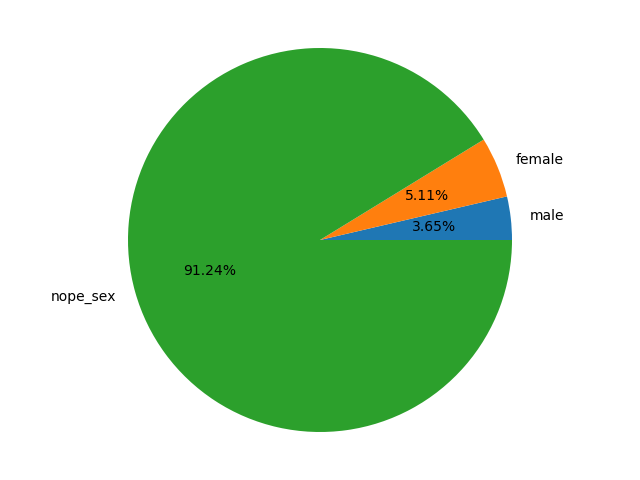

In [6]:
# draw pie chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
type_of_sex = ['male', 'female', 'nope_sex']
patient_sex = [male,female,nope_sex]
ax.pie(patient_sex, labels = type_of_sex, autopct='%1.2f%%')
plt.show()

<IPython.core.display.Javascript object>


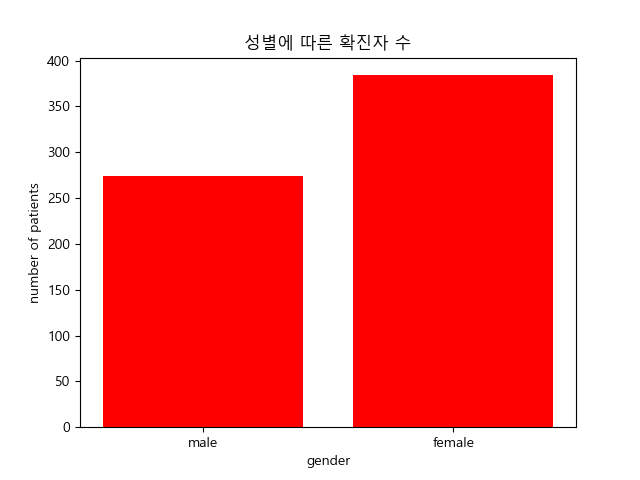

In [11]:
# I wnat to use Korean!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# draw bar chart
type_of_sex = type_of_sex[:2]
patient_sex = patient_sex[:2]

x_pos = [i for i, _ in enumerate(type_of_sex)]

plt.bar(x_pos, patient_sex, color='red')
plt.xlabel("gender")
plt.ylabel("number of patients")
plt.title("성별에 따른 확진자 수")

plt.xticks(x_pos, type_of_sex)

plt.show()

### 사망자와 완치자

In [12]:
# 사망자와 완치자의 수
deceased = 0
released = 0
nope_state = 0

for i in range(len(raw_)):
    state_of_patient = raw_[i][14]
    
    if(state_of_patient == 'deceased'):
        deceased = deceased + 1
    elif(state_of_patient == 'released'):
        released = released + 1
    else:
        nope_state = nope_state + 1
        
print("사망자 : " + str(deceased))
print("완치자 : " + str(released))
print("???? 확진자 상태 : " + str(nope_state))

사망자 : 31
완치자 : 55
???? 확진자 상태 : 7427


In [16]:
# 나이대별 확진자의 수

age000 = 0
age010 = 0
age020 = 0
age030 = 0
age040 = 0
age050 = 0
age060 = 0
age070 = 0
age080 = 0
age090 = 0
age100 = 0
nope_age = 0

for i in range(len(raw_)):
    
    if(raw_[i][2] == ''):
        nope_age = nope_age + 1
    else:
        age_of_patient = 2020 - int(raw_[i][2])

        if(0 <= age_of_patient < 10):
            age000 = age000 + 1
        elif(10 <= age_of_patient < 20):
            age010 = age010 + 1
        elif(20 <= age_of_patient < 30):
            age020 = age020 + 1
        elif(30 <= age_of_patient < 40):
            age030 = age030 + 1
        elif(40 <= age_of_patient < 50):
            age040 = age040 + 1
        elif(50 <= age_of_patient < 60):
            age050 = age050 + 1
        elif(60 <= age_of_patient < 70):
            age060 = age060 + 1
        elif(70 <= age_of_patient < 80):
            age070 = age070 + 1
        elif(80 <= age_of_patient < 90):
            age080 = age080 + 1
        elif(90 <= age_of_patient < 100):
            age090 = age100 + 1
        else:
            age100 = age100 + 1
            
print("어린이 확진자 : " + str(age000))
print("10대 확진자 : " + str(age010))
print("20대 확진자 : " + str(age020))
print("30대 확진자 : " + str(age030))
print("40대 확진자 : " + str(age040))
print("50대 확진자 : " + str(age050))
print("60대 확진자 : " + str(age060))
print("70대 확진자 : " + str(age070))
print("80대 확진자 : " + str(age080))
print("90대 확진자 : " + str(age090))
print("100세 이상 확진자 : " + str(age100))
print("나이 미상 확진자 : " + str(nope_age))

어린이 확진자 : 4
10대 확진자 : 11
20대 확진자 : 139
30대 확진자 : 94
40대 확진자 : 112
50대 확진자 : 138
60대 확진자 : 95
70대 확진자 : 34
80대 확진자 : 17
90대 확진자 : 1
100세 이상 확진자 : 0
나이 미상 확진자 : 6868


In [17]:
# 주 활동 지역에 대한 정보 획득하기
regions = []

for i in range(len(raw_)):
    region = raw_[i][4] 
    
    if(region == ''):
        pass
    else:        
        if region in regions:
            pass
        else:
            regions.append(region)
            
pprint.pprint(regions)

['filtered at airport',
 'capital area',
 'Jeollabuk-do',
 'Gwangju',
 'Daegu',
 'Gyeongsangbuk-do',
 'Jeju-do',
 'Busan',
 'Daejeon',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Ulsan',
 'Gangwon-do',
 'Jeollanam-do']


In [23]:
# 주 활동 지역별 확진자 수 확인
regions_count = []

for i in range(len(regions) + 1):
    regions_count.append([])

for i in range(len(raw_)):
    region = raw_[i][4]
    
    for j in range(len(regions)):
        if(region == regions[j]):
            regions_count[j].append(1)

regions_patient = ()
    
for i in range(len(regions)):
    regions_patient = regions_patient + tuple((regions[i], sum(regions_count[i])))

pprint.pprint(regions_patient)

('filtered at airport',
 4,
 'capital area',
 191,
 'Jeollabuk-do',
 3,
 'Gwangju',
 11,
 'Daegu',
 53,
 'Gyeongsangbuk-do',
 126,
 'Jeju-do',
 2,
 'Busan',
 1,
 'Daejeon',
 13,
 'Chungcheongbuk-do',
 2,
 'Chungcheongnam-do',
 1,
 'Ulsan',
 2,
 'Gangwon-do',
 5,
 'Jeollanam-do',
 3)


In [26]:
# 감염 원인들에 대한 정보 획득
reasons = []

for i in range(len(raw_)):
    reason = raw_[i][7] 
    
    if(reason == ''):
        pass
    else:        
        if reason in reasons:
            pass
        else:
            reasons.append(reason)
            
pprint.pprint(reasons)

['visit to Wuhan',
 'contact with patient',
 'contact with patient in Japan',
 'residence in Wuhan',
 'visit to Thailand',
 'contact with patient in Singapore',
 'visit to China',
 'visit to Daegu',
 'pilgrimage to Israel',
 'visit to Vietnam',
 'visit to Japan',
 'visit to Italy']


In [28]:
# 감염 원인별 확진자 수 확인
reasons_count = []

for i in range(len(reasons) + 1):
    reasons_count.append([])

for i in range(len(raw_)):
    reason = raw_[i][7]
    
    for j in range(len(reasons)):
        if(reason == reasons[j]):
            reasons_count[j].append(1)

reasons_patient = ()
    
for i in range(len(reasons)):
    reasons_patient = reasons_patient + tuple((reasons[i], sum(reasons_count[i])))

pprint.pprint(reasons_patient)

('visit to Wuhan',
 8,
 'contact with patient',
 75,
 'contact with patient in Japan',
 1,
 'residence in Wuhan',
 2,
 'visit to Thailand',
 2,
 'contact with patient in Singapore',
 2,
 'visit to China',
 2,
 'visit to Daegu',
 43,
 'pilgrimage to Israel',
 6,
 'visit to Vietnam',
 1,
 'visit to Japan',
 1,
 'visit to Italy',
 1)


In [29]:
# 감염 집단들에 대한 정보 획득
groups = []

for i in range(len(raw_)):
    group = raw_[i][6] 
    
    if(group == ''):
        pass
    else:        
        if group in groups:
            pass
        else:
            groups.append(group)
            
pprint.pprint(groups)

['Shincheonji Church',
 'Cheongdo Daenam Hospital',
 "Eunpyeong St. Mary's Hospital",
 'Pilgrimage',
 'Myungsung church']


In [30]:
# 감염 집단별 확진자 수 확인
groups_count = []

for i in range(len(groups) + 1):
    groups_count.append([])

for i in range(len(raw_)):
    group = raw_[i][6]
    
    for j in range(len(groups)):
        if(group == groups[j]):
            groups_count[j].append(1)

groups_patient = ()
    
for i in range(len(groups)):
    groups_patient = groups_patient + tuple((groups[i], sum(groups_count[i])))

pprint.pprint(groups_patient)

('Shincheonji Church',
 53,
 'Cheongdo Daenam Hospital',
 9,
 "Eunpyeong St. Mary's Hospital",
 13,
 'Pilgrimage',
 6,
 'Myungsung church',
 1)
